# 1. Importing Libraries & Data Exploration

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from math import pi #Used in Radar Plots
import seaborn as sns
sns.set_style(style='darkgrid')
import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input/fifa-19-player-dataset/FIFA19.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
fifa_data = pd.read_csv('/kaggle/input/fifa-19-player-dataset/FIFA19.csv')

# 2. Data Manipulation 

In [3]:
columns = list(fifa_data.columns)  # To print all the columns
print(columns)

['Unnamed: 0', 'Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value', 'Wage', 'Preferred Foot', 'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate', 'Position', 'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until', 'Height', 'Weight', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause', 'League', 'Speciality']


In [4]:
fifa_data.head()

,Unnamed: 0,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,League,Speciality
0,0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,Left,5.0,4.0,4.0,Medium/ Medium,RF,10.0,"Jul 1, 2004",Not on loan,2021,5'7,159lbs,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M,LALIGA SANTANDER,Complete Forward
1,1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,Right,5.0,4.0,5.0,High/ Low,ST,7.0,"Jul 10, 2018",Not on loan,2022,6'2,183lbs,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M,SERIE A TIM,Distance Shooter
2,2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,Right,5.0,5.0,5.0,High/ Medium,LW,10.0,"Aug 3, 2017",Not on loan,2022,5'9,150lbs,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M,LIGUE 1 CONFORAMA,Complete Forward
3,3,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,Right,4.0,3.0,1.0,Medium/ Medium,GK,1.0,"Jul 1, 2011",Not on loan,2020,6'4,168lbs,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M,PREMIER LEAGUE,Goalkeeper
4,4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,Right,4.0,5.0,4.0,High/ High,RCM,7.0,"Aug 30, 2015",Not on loan,2023,5'11,154lbs,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M,PREMIER LEAGUE,Complete Midfielder


In [5]:
fifa_data.tail()

,Unnamed: 0,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,League,Speciality
18142,18202,J. Lundstram,19,England,47,65,Crewe Alexandra,€60K,€1K,Right,1.0,2.0,2.0,Medium/ Medium,CM,22.0,"May 3, 2017",Not on loan,2019,5'9,134lbs,34.0,38.0,40.0,49.0,25.0,42.0,30.0,34.0,45.0,43.0,54.0,57.0,60.0,49.0,76.0,43.0,55.0,40.0,47.0,38.0,46.0,46.0,39.0,52.0,43.0,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K,EFL LEAGUE TWO,No Speciality
18143,18203,N. Christoffersson,19,Sweden,47,63,Trelleborgs FF,€60K,€1K,Right,1.0,2.0,2.0,Medium/ Medium,ST,21.0,"Mar 19, 2018",Not on loan,2020,6'3,170lbs,23.0,52.0,52.0,43.0,36.0,39.0,32.0,20.0,25.0,40.0,41.0,39.0,38.0,40.0,52.0,41.0,47.0,43.0,67.0,42.0,47.0,16.0,46.0,33.0,43.0,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K,ALLSVENSKAN,No Speciality
18144,18204,B. Worman,16,England,47,67,Cambridge United,€60K,€1K,Right,1.0,3.0,2.0,Medium/ Medium,ST,33.0,"Jul 1, 2017",Not on loan,2021,5'8,148lbs,25.0,40.0,46.0,38.0,38.0,45.0,38.0,27.0,28.0,44.0,70.0,69.0,50.0,47.0,58.0,45.0,60.0,55.0,32.0,45.0,32.0,15.0,48.0,43.0,55.0,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K,0,No Speciality
18145,18205,D. Walker-Rice,17,England,47,66,Tranmere Rovers,€60K,€1K,Right,1.0,3.0,2.0,Medium/ Medium,RW,34.0,"Apr 24, 2018",Not on loan,2019,5'10,154lbs,44.0,50.0,39.0,42.0,40.0,51.0,34.0,32.0,32.0,52.0,61.0,60.0,52.0,21.0,71.0,64.0,42.0,40.0,48.0,34.0,33.0,22.0,44.0,47.0,50.0,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,€143K,EFL LEAGUE TWO,No Speciality
18146,18206,G. Nugent,16,England,46,66,Tranmere Rovers,€60K,€1K,Right,1.0,3.0,2.0,Medium/ Medium,CM,33.0,"Oct 30, 2018",Not on loan,2019,5'10,176lbs,41.0,34.0,46.0,48.0,30.0,43.0,40.0,34.0,44.0,51.0,57.0,55.0,55.0,51.0,63.0,43.0,62.0,47.0,60.0,32.0,56.0,42.0,34.0,49.0,33.0,43.0,40.0,43.0,50.0,10.0,15.0,9.0,12.0,9.0,€165K,EFL LEAGUE TWO,No Speciality


# 3. Let's Start with Analysis

In [6]:
#Calculate average Overall rating by Club
average_rating_by_club = fifa_data.groupby('Club')['Overall'].mean()

# Find the club with the highest average rating
highest_rated_club = average_rating_by_club.idxmax()
highest_rating = average_rating_by_club.max()

print(f'The club with the highest average Overall rating is {highest_rated_club} with an average rating of {highest_rating:.2f}')

The club with the highest average Overall rating is Juventus with an average rating of 82.28


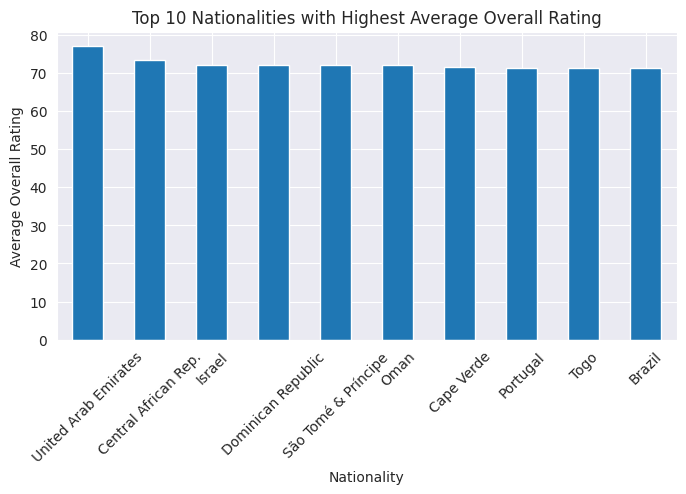

In [7]:
average_rating_by_nationality = fifa_data.groupby('Nationality')['Overall'].mean()

# Sort the values in descending order for better visualization
average_rating_by_nationality = average_rating_by_nationality.sort_values(ascending=False)

# Plot the results
plt.figure(figsize=(8,4))
average_rating_by_nationality.head(10).plot(kind='bar')  # Plot the top 10 nationalities
plt.xlabel('Nationality')
plt.ylabel('Average Overall Rating')
plt.title('Top 10 Nationalities with Highest Average Overall Rating')
plt.xticks(rotation=45)
plt.show()

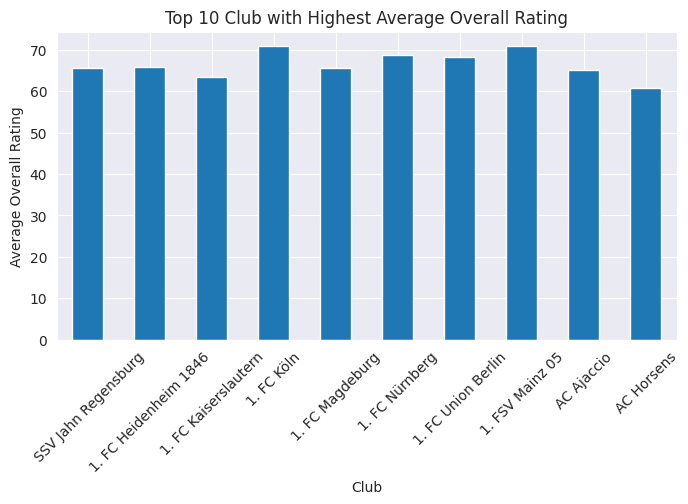

In [8]:
average_rating_by_club = fifa_data.groupby('Club')['Overall'].mean()

# Sort the values in descending order for better visualization
average_rating_by_nationality = average_rating_by_nationality.sort_values(ascending=False)

# Plot the results
plt.figure(figsize=(8,4))
average_rating_by_club.head(10).plot(kind='bar')  # Plot the top 10 nationalities
plt.xlabel('Club')
plt.ylabel('Average Overall Rating')
plt.title('Top 10 Club with Highest Average Overall Rating')
plt.xticks(rotation=45)
plt.show()

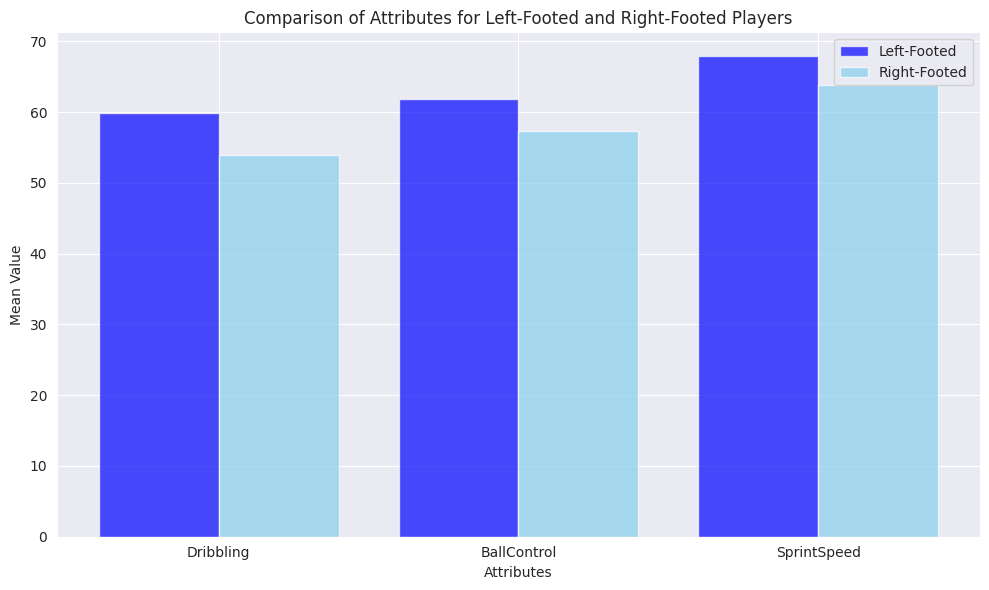

In [9]:

# Comparison of Attributes for Left-Footed and Right-Footed Players
left_footed_players = fifa_data[fifa_data['Preferred Foot'] == 'Left']
right_footed_players = fifa_data[fifa_data['Preferred Foot'] == 'Right']

# Calculate means for attributes
left_attributes_mean = left_footed_players[['Dribbling', 'BallControl', 'SprintSpeed']].mean()
right_attributes_mean = right_footed_players[['Dribbling', 'BallControl', 'SprintSpeed']].mean()

# Create a bar chart
attributes = ['Dribbling', 'BallControl', 'SprintSpeed']
x = range(len(attributes))

plt.figure(figsize=(10, 6))

# Left-footed players in blue
plt.bar(x, left_attributes_mean, width=0.4, label='Left-Footed', color='blue', alpha=0.7)

# Right-footed players in green
plt.bar([i + 0.4 for i in x], right_attributes_mean, width=0.4, label='Right-Footed', color='skyblue', alpha=0.7)

plt.xlabel('Attributes')
plt.ylabel('Mean Value')
plt.title('Comparison of Attributes for Left-Footed and Right-Footed Players')
plt.xticks([i + 0.2 for i in x], attributes)
plt.legend()
plt.tight_layout()
plt.show()

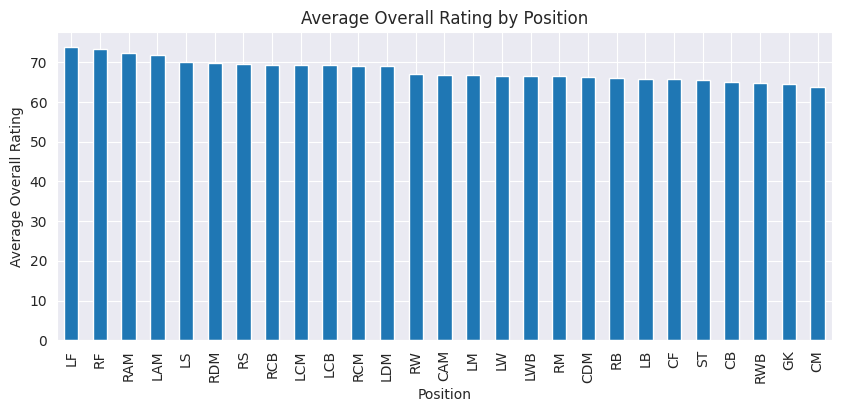

In [10]:
plt.figure(figsize=(10, 4))
fifa_data.groupby('Position')['Overall'].mean().sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Position')
plt.ylabel('Average Overall Rating')
plt.title('Average Overall Rating by Position')
plt.xticks(rotation=90)
plt.show()

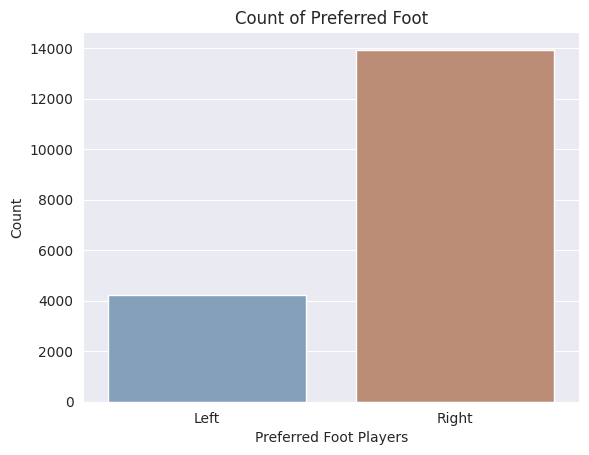

In [11]:
plt.figure(dpi=100)
sns.countplot(x='Preferred Foot', data=fifa_data, palette='twilight_shifted')
plt.xlabel('Preferred Foot Players')
plt.ylabel('Count')
plt.title('Count of Preferred Foot')

Right, Left = fifa_data['Preferred Foot'].value_counts()
plt.show()


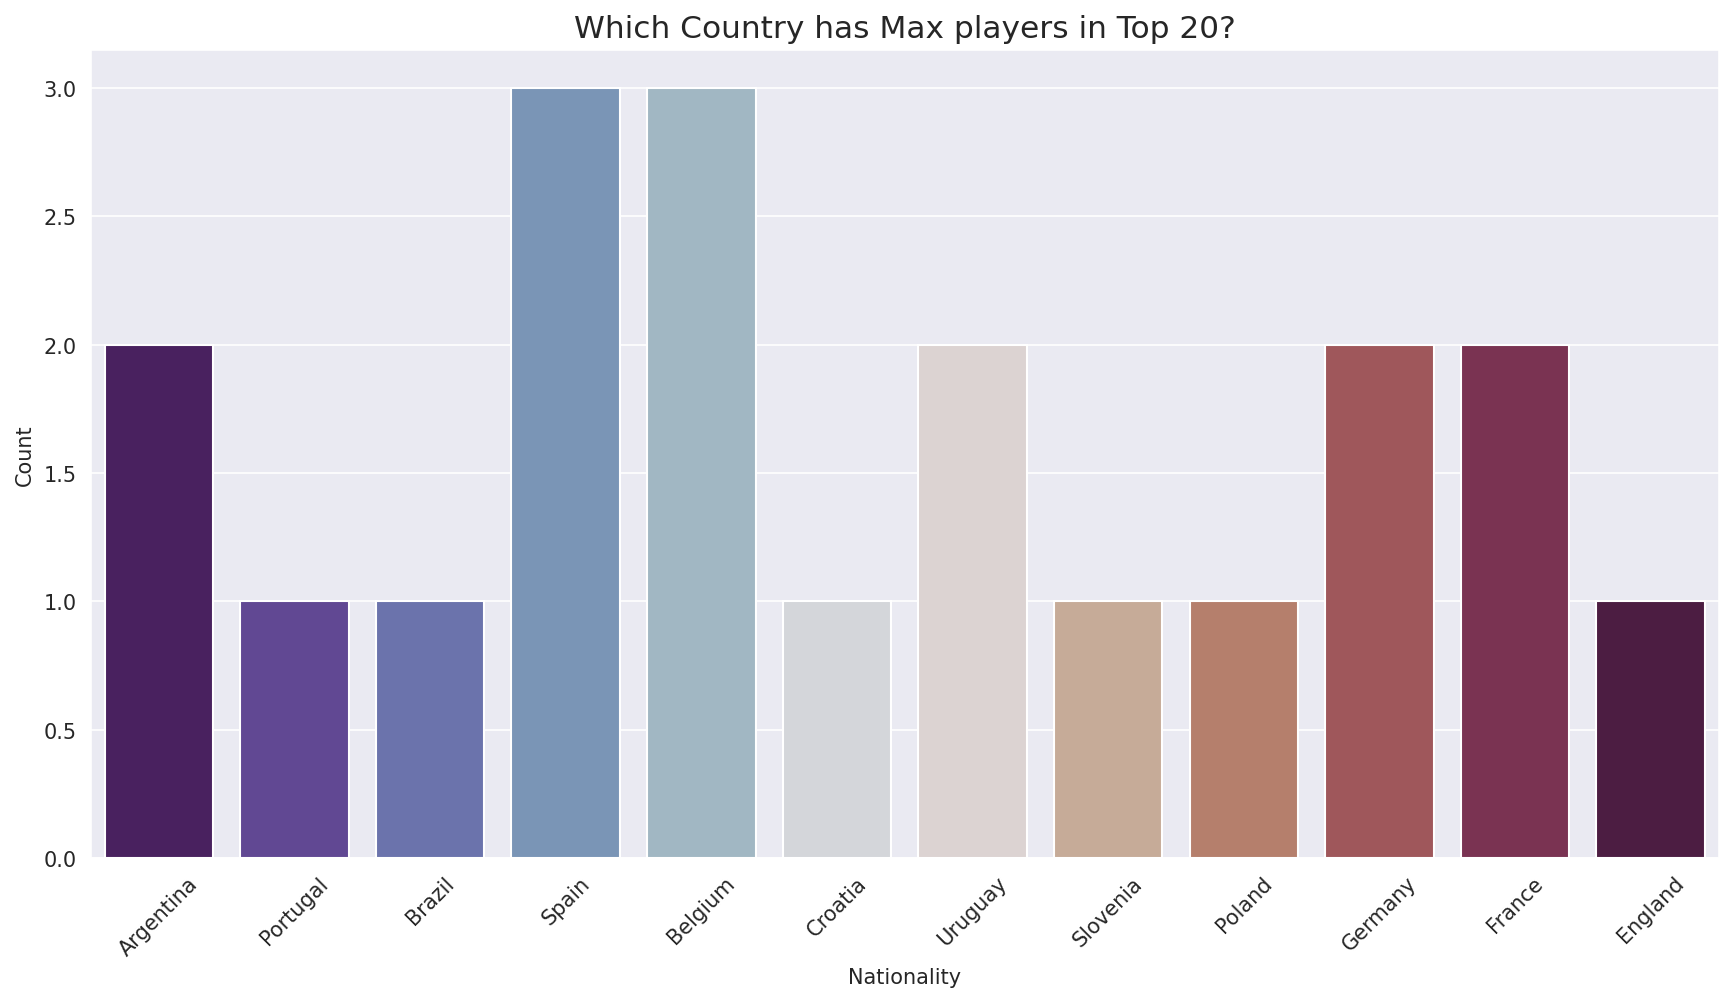

In [12]:
plt.figure(figsize=(14,7),dpi=150)
sns.countplot(x='Nationality', data=fifa_data.head(20), palette='twilight_shifted')
plt.xlabel('Nationality')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.title('Which Country has Max players in Top 20?',fontsize = 15)
plt.show()


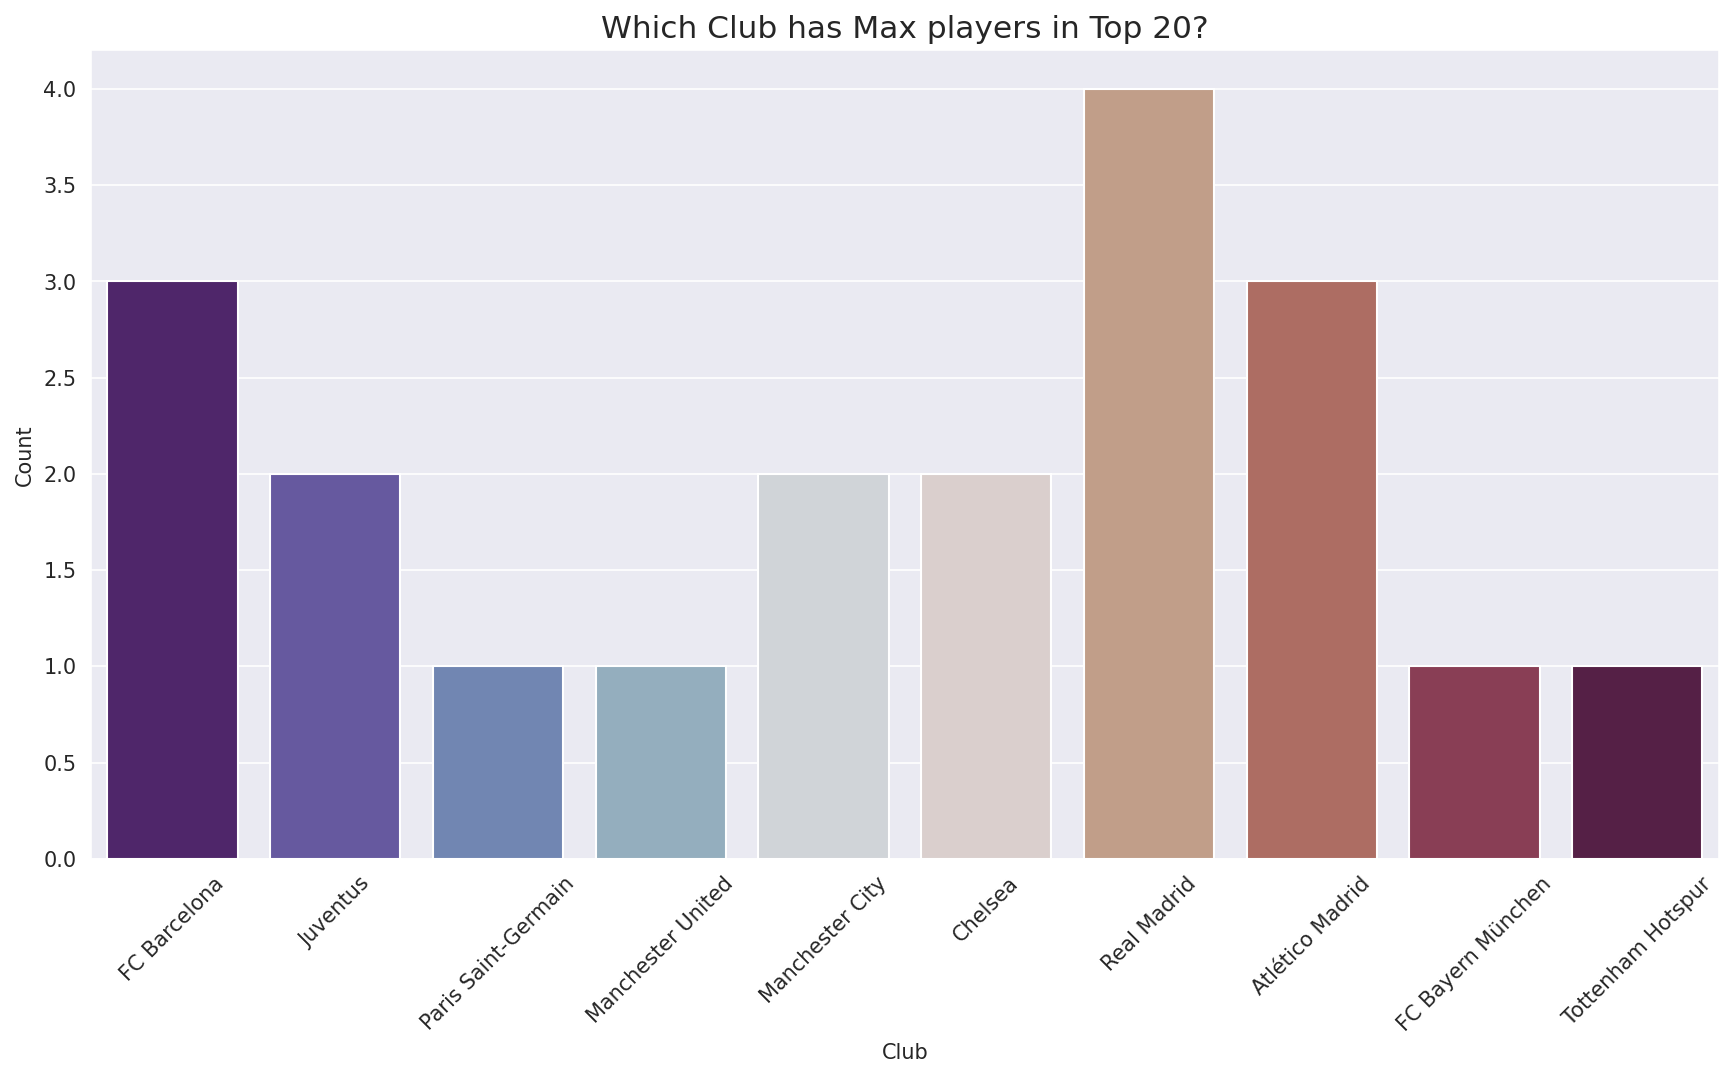

In [13]:
plt.figure(figsize=(14,7),dpi=150)
sns.countplot(x='Club', data=fifa_data.head(20), palette='twilight_shifted')
plt.xlabel('Club')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.title('Which Club has Max players in Top 20?',fontsize = 15)
plt.show()


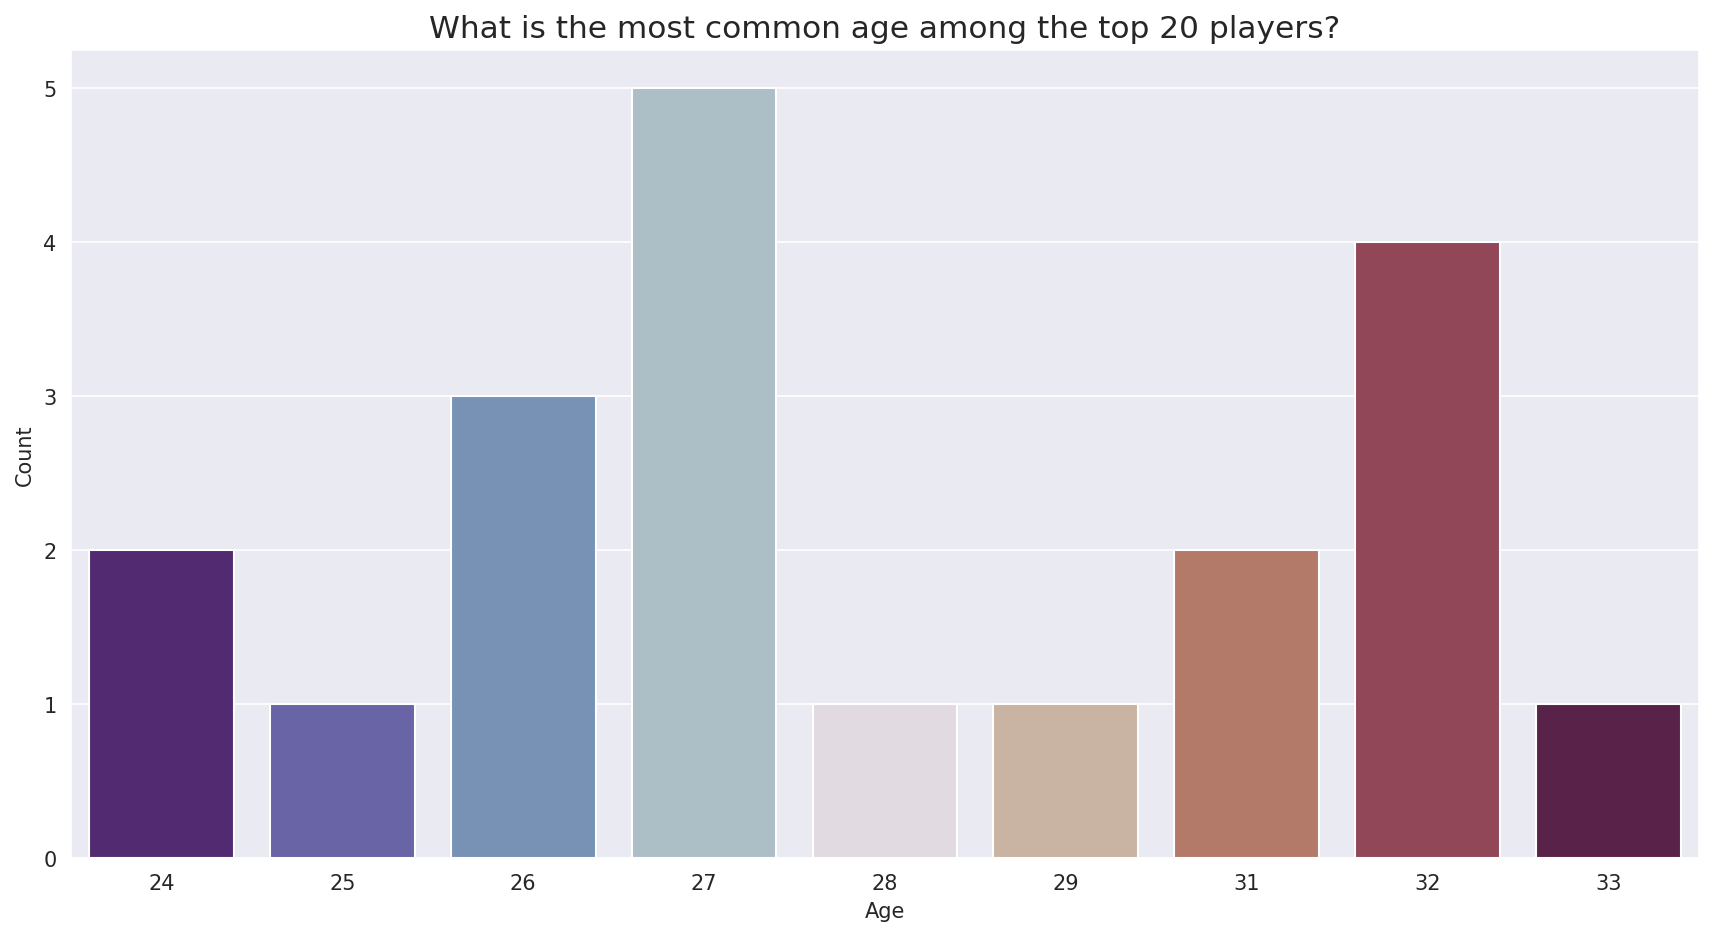

In [14]:

plt.figure(figsize=(14,7),dpi=150)
sns.countplot(x='Age', data=fifa_data.head(20), palette='twilight_shifted')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('What is the most common age among the top 20 players?',fontsize = 15)
plt.show()


#  3.1 The Ultimate Rivalry - **MESSI** vs **RONALDO**

In [15]:
column_r=['Name','Overall','Potential','Finishing','ShortPassing','Dribbling','BallControl','Stamina','Strength']
rival = fifa_data.head(2)[column_r]
rival= rival.set_index('Name')
rival.head()

,Overall,Potential,Finishing,ShortPassing,Dribbling,BallControl,Stamina,Strength
Name,,,,,,,,
L. Messi,94,94,95.0,90.0,97.0,96.0,72.0,59.0
Cristiano Ronaldo,94,94,94.0,81.0,88.0,94.0,88.0,79.0


In [16]:
values  = rival.iloc[0].tolist()
values  += values  [:1]
values 

[94.0, 94.0, 95.0, 90.0, 97.0, 96.0, 72.0, 59.0, 94.0]

In [17]:
values2 = rival.iloc[1].tolist()
values2 += values2[:1]
values2

[94.0, 94.0, 94.0, 81.0, 88.0, 94.0, 88.0, 79.0, 94.0]

In [18]:
def RadarChart(player, data, player2, data2):
    Attributes = ["Overall","Potential","Agility","Finishing","ShortPassing","Dribbling","BallControl","Stamina"]
    
    data2 += data2 [:1]
    angles = [n / 8 * 2 * pi for n in range(8)]
    angles += angles [:1]
    
    angles2 = [n / 8 * 2 * pi for n in range(8)]
    angles2 += angles2 [:1]
    plt.figure(dpi=125)
    ax = plt.subplot(111, polar=True)
    ax = plt.subplot(111, polar=True)
    
    plt.xticks(angles[:-1],Attributes)

    ax.plot(angles,values)
    ax.fill(angles, values, 'pink', alpha=0.1)

    ax.plot(angles2,values2)
    ax.fill(angles2, values2, 'yellow', alpha=0.1)

    plt.figtext(0.1,0.98,player,color="steelblue")
    plt.figtext(0.1,0.94,"vs")
    plt.figtext(0.1,0.9,player2,color="darkorange")
    
    plt.show()

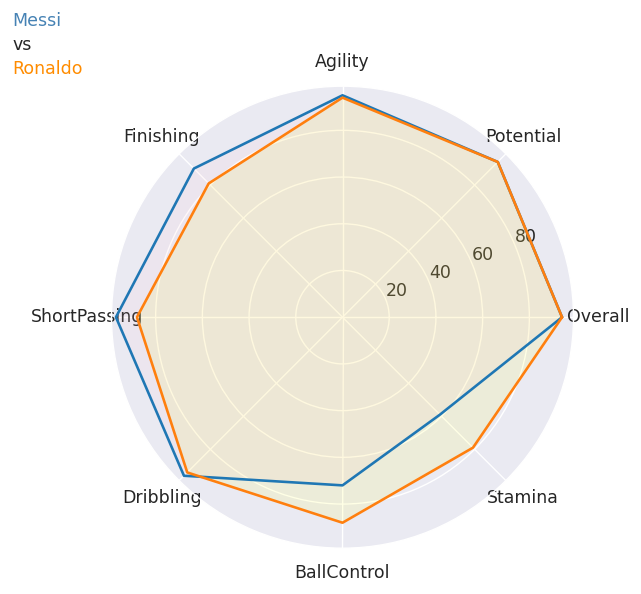

In [19]:
RadarChart("Messi",[94.0, 94.0, 87.0, 92.0, 92.0, 96.0, 39.0, 66.0, 94.0],"Ronaldo",[93.0, 93.0, 90.0, 93.0, 82.0, 89.0, 35.0, 78.0, 93.0])




 Findings: Out of 8 attributes - Messi performed well in 5 and Ronaldo in 3

![ Write anything over here ](https://assets.goal.com/v3/assets/bltcc7a7ffd2fbf71f5/blt029ce8201a8f2af7/61b86e2d2ef1a05f638b1ee5/UCL.jpg?auto=webp&format=pjpg&width=1920&quality=60) ![]()

#  3.1 Word Cloud

In [20]:
from wordcloud import WordCloud

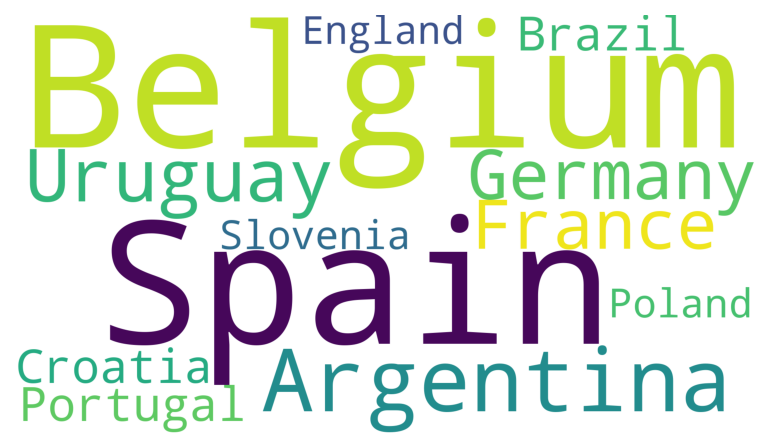

In [21]:
plt.subplots(dpi=150)
wordcloud = WordCloud(background_color='white',width=1920,height=1080).generate(" ".join(fifa_data.head(20)['Nationality']))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

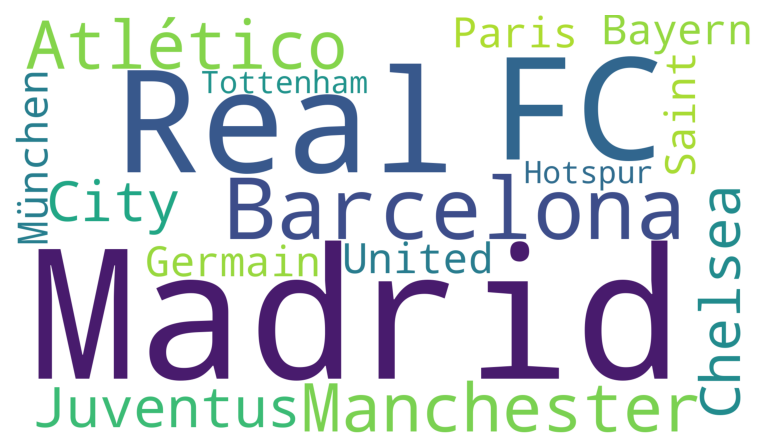

In [22]:
plt.subplots(dpi=150)
wordcloud = WordCloud(background_color='white',width=1920,height=1080).generate(" ".join(fifa_data.head(20)['Club']))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()